In [9]:
import numpy as np
from matplotlib import pyplot as plt
from statistics import NormalDist

In [10]:
# c = s*N(d1) - k*(e^-r*t)*N(d2)

# d1 = (ln(s/k) + ((r + (sigma^2)/2)^2)*t)/(sigma*sqrt(t))

# d2 = d1 - sigma*sqrt(t)

# N(x) = (1/(sigma*sqrt(2*pi))* exp(-0.5*(((x-u)^2)/sigma)))

In [11]:
sigma = np.arange(0,1,0.01)

In [52]:
s = 38.25
k = 40.0
r = 0.01
t = 9/365
c0 = 0.86

In [53]:
x = sigma
y = []
for i in x:
    d1 = (np.log(s/k) + ((r + (i**2)/2)**2)*t)/(i*np.sqrt(t))
    d2 = d1 - i*np.sqrt(t)
    value = s*NormalDist(mu=0, sigma=1).cdf(d1) - k*(np.exp(-r*t))*NormalDist(mu=0, sigma=1).cdf(d2) -c0
    y.append(value)

/var/folders/mb/s55_rmmx4gq6kyms8tszjclh0000gn/T/ipykernel_80273/431836814.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(s/k) + ((r + (i**2)/2)**2)*t)/(i*np.sqrt(t))


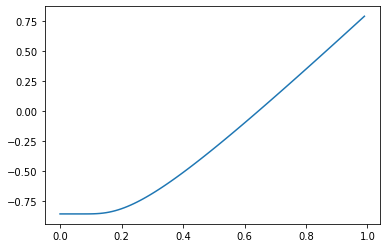

In [54]:
plt.plot(x, y)

In [55]:
i = 0.279
d1 = (np.log(s/k) + ((r + (i**2)/2)**2)*t)/(i*np.sqrt(t))
d2 = d1 - i*np.sqrt(t)
value = s*NormalDist(mu=0, sigma=1).cdf(d1) - k*(np.exp(-r*t))*NormalDist(mu=0, sigma=1).cdf(d2) -c0
print(value)

-0.7215639420337766


In [74]:
vol = np.arange(0.001,1,0.0001)
tol = 0.0001
for i in vol:
    d1 = (np.log(s/k) + ((r + (i**2)/2)**2)*t)/(i*np.sqrt(t))
    d2 = d1 - i*np.sqrt(t)
    value = s*NormalDist(mu=0, sigma=1).cdf(d1) - k*(np.exp(-r*t))*NormalDist(mu=0, sigma=1).cdf(d2) -c0

    if value < tol and value > -tol:
        wow = i
     

In [75]:
wow

0.6456000000000003

In [65]:
vega = s*NormalDist(mu=0, sigma=1).pdf(d1)*np.sqrt(t)

In [66]:
vol = 0.5

d1 = (np.log(s/k) + ((r + (i**2)/2)**2)*t)/(i*np.sqrt(t))

In [69]:
from math import sqrt, exp, log, pi
from statistics import NormalDist

def d(sigma,S,k,r,t):
    d1 = 1/(sigma*sqrt(t)) * (log(S/k) + (r + sigma**2/2) * t)
    d2 = d1 - sigma * sqrt(t)
    return d1, d2 

def call_price(sigma, S, k, r, t, d1, d2):
    C = NormalDist(mu=0, sigma=1).cdf(d1) * S - NormalDist(mu=0, sigma=1).cdf(d2) * k * exp(-r * t)
    return C

def iv(S,k,t,r,c0):

    tol = 1e-3
    epsilon = 1

    count = 0
    max_iter = 1000

    vol = 0.99 

    while epsilon > tol:
        count += 1
        orig_vol = vol

        d1, d2 = d(vol, S, k, r, t)
        function_value = call_price(vol, S, k, r, t, d1, d2) - c0  

        vega = S * NormalDist(mu=0, sigma=1).pdf(d1) * sqrt(t)
        if vega != 0.0:
        
            vol = -function_value/ vega + vol

            epsilon = abs( (vol - orig_vol) / orig_vol )
        
        else:
            vol = 0.99

        if count > max_iter:
            break

    return vol


In [70]:
alpha = iv(s,k,t,r,c0)

In [61]:
alpha

0.6450885738412688